# Plotting in Python

A picture is worth a thousand words. While exploring an unknow data set the visualisation of data is a powerful way to more understanding and an important part of data science.

The Python ecosystem includes several low and high level plotting/visualization libraries. The most feature-complete and popular one is [**matplotlib**](https://matplotlib.org). Among the alternatives are [**bokeh**](https://bokeh.pydata.org/en/latest/) and [**plotly**](https://plot.ly/python/), focusing on interactive visualizations.

Libraries like [**seaborn**](http://seaborn.pydata.org) are built on matplotlib and provide a high-level interface for visual data analysis. The [**pandas**](http://pandas.pydata.org/) library also provides a more high-level plotting interface that uses matplotlib.

## matplotlib

We now import matplotlib as well as the matplotlib module [**pyplot**](https://matplotlib.org/api/pyplot_api.html). To show the plots inline in the notebook we set

```python
%matplotlib inline
```

and then configure the default plot style and figure size.


In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16.0, 8.0)

#### Load the dataset
The data set is of roughly 5000 different white wine samples ([Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality)). The different columns are chemical and physical characteristics. In addition a quality score is given.

In [4]:
WINE_COLOR = 'red'
df = pd.read_csv(f'../.assets/data/winequality/{WINE_COLOR}.csv.zip', sep=';')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


_Note:_  [Documentation of the data set and additional information](https://files.point-8.de/trainings/data-science-101/wine-quality/INFO.md)

## Bar chart

As a first example we will check how the wine quality is distributed. To do so we use a **bar chart**, because we have discrete values to denote the wine quality.

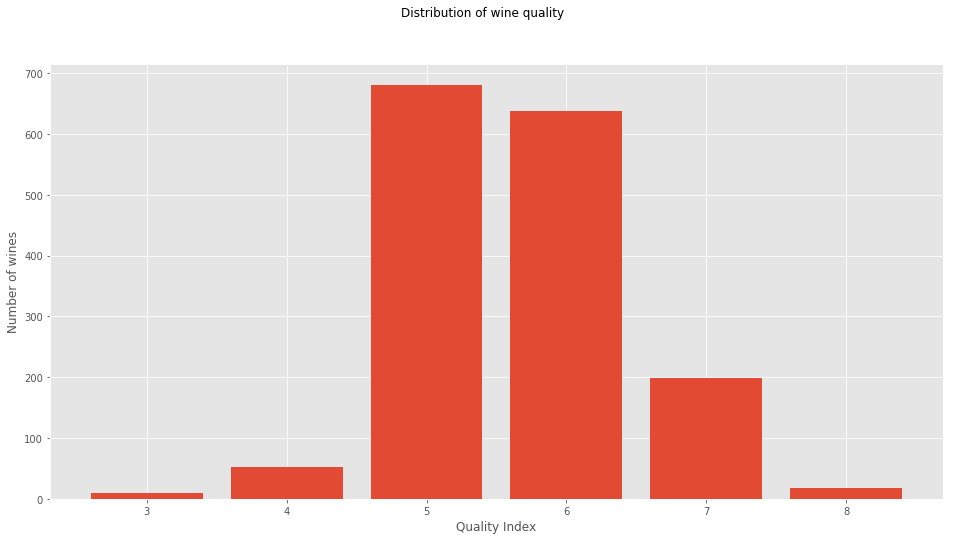

In [6]:
plt.bar(x=df.quality.unique(), height=df.quality.value_counts())
plt.xlabel('Quality Index')
plt.ylabel('Number of wines')
plt.suptitle('Distribution of wine quality');

## Box plot

A nice option to visualize the statistical distribution of a data set are [**box plots**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html). The _box_ itself includes by definition the central 50% of the data. Thereby, the box includes all data point from the 0.25-quantile (Q1) to the 0.75-quantile (Q3). Its length is called _interquantile range_ (IQR). In blue we see the **median** (Q2, 0.5-quantile), the **mean** ist the dotted line. The length of two _whiskers_ is 1.5 times the extent of the box: median $\pm$ 1.5xIQR. The whisker allways ends on the last data point laying in the range of a whisker. All data lying outside of the whisker edges can be classifyied as outliers (marked by `x`).

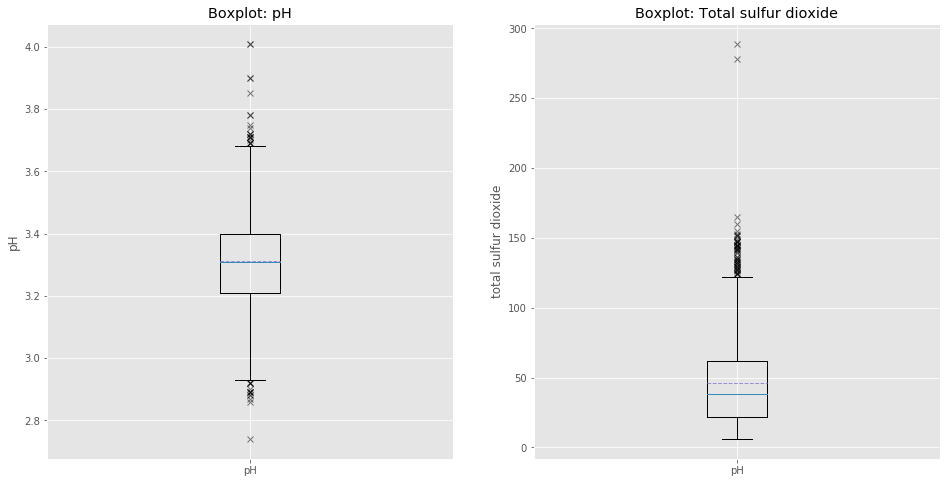

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].boxplot(df['pH'], 
            showmeans=True, 
            meanline=True, 
            whis=1.5, 
            labels=['pH'], 
            flierprops = {'color': 'silver', 'alpha': 0.5, 'marker': 'x'})
axes[0].set_ylabel('pH');
axes[0].set_title('Boxplot: pH');


axes[1].boxplot(df['total sulfur dioxide'], 
            showmeans=True, 
            meanline=True, 
            whis=1.5, 
            labels=['pH'], 
            flierprops = {'color': 'silver', 'alpha': 0.5, 'marker': 'x'})
axes[1].set_ylabel('total sulfur dioxide');
axes[1].set_title('Boxplot: Total sulfur dioxide');

Below, the distribution of all variables visualised as box plots:

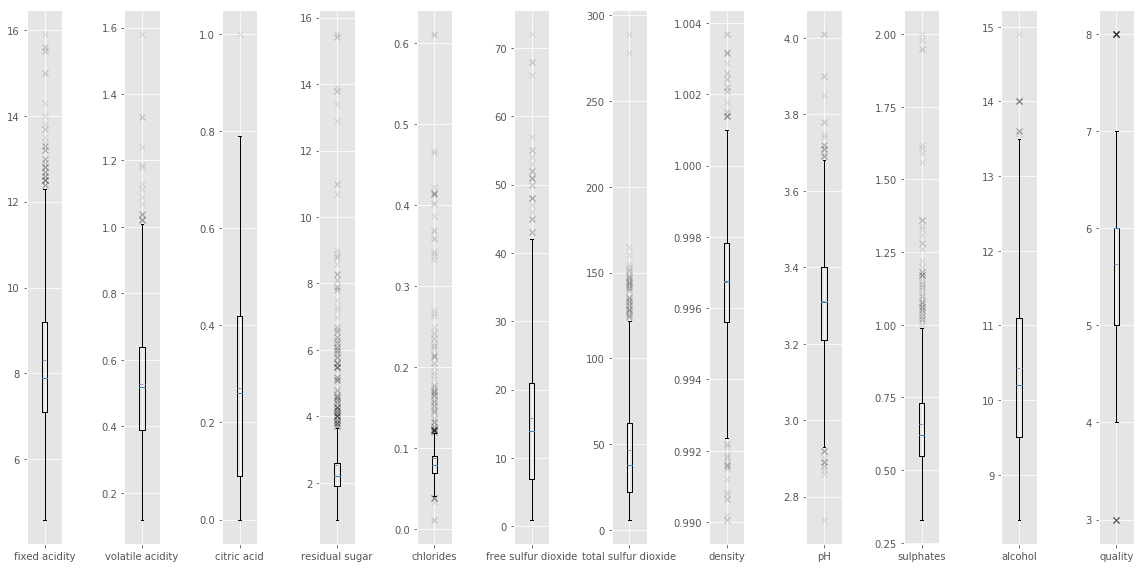

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=df.columns.size)
for idx, c in enumerate(df.columns):
    axes[idx].boxplot(df[c], 
                      showmeans=True, 
                      meanline=True, 
                      whis=1.5, 
                      labels=[c], 
                      flierprops = {'color': 'silver', 'alpha': 0.1, 'marker': 'x'});
plt.tight_layout()    

## Histogram

Another possibility to visualize the distribution of data is the [**histogram**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html). In this case we have a continuous range of pH values, and want to visualize how the wines are distributed over this range. Each data point is added to it's associated value range (**bin**). The height of each bar corresponds to the number of entries per bin.

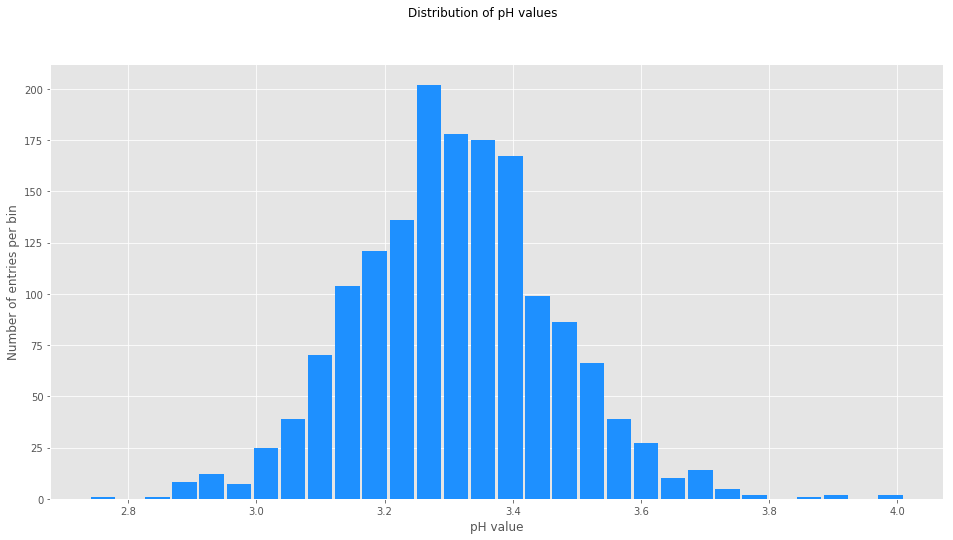

In [9]:
plt.suptitle("Distribution of pH values")
plt.hist(df['pH'], 
         bins=30, 
         rwidth=0.9, 
         density = False, 
         color='dodgerblue')
plt.xlabel('pH value')
plt.ylabel('Number of entries per bin');

## Violin plot

Another interesting option for showing distributions is the [**violin plot**](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.violinplot.html). It can be thought of as a combination of box plot and histogram. 

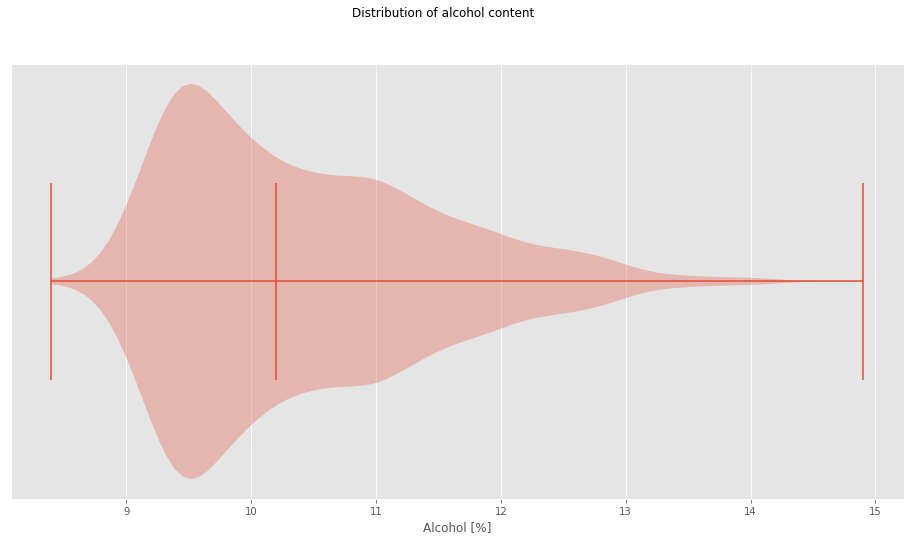

In [10]:
plt.suptitle("Distribution of alcohol content")
plt.violinplot(df[['alcohol']].values, 
               showmeans=False, 
               showmedians=True, 
               showextrema=True, 
               vert=False)
plt.yticks([])  # Remove y-axis
plt.xlabel('Alcohol [%]');

## Scatter plot

To put the distributions of two variables in relation, we can use [**scatter plots**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). Here we compare how the residual sugar concentration behaves in comparison to the volumentric alcohol concentration.

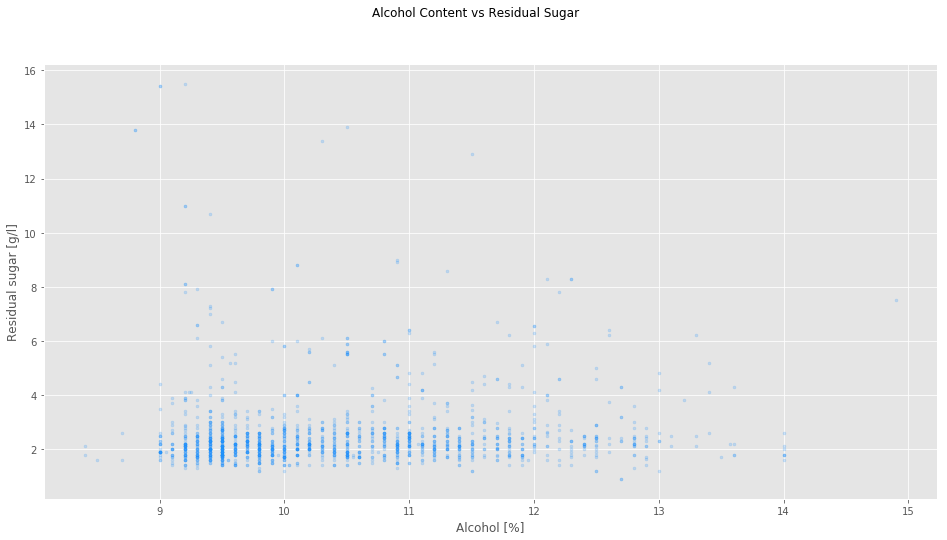

In [11]:
plt.suptitle("Alcohol Content vs Residual Sugar")
plt.scatter(x=df[df['residual sugar'] < 25]['alcohol'], 
            y=df[df['residual sugar'] < 25]['residual sugar'], 
            marker='.', 
            alpha=0.2, 
            color='dodgerblue')
plt.xlabel('Alcohol [%]')
plt.ylabel('Residual sugar [g/l]');

## 2d-histogram (_Heatmap_)

Alternatively, we can visualize the point density using a [**2-dimensional histogram**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) (also called **heatmap**). The value range is again divided into discrete bins. The bin boundaries may be rectangular or hexagonal. The number of entries per bin is visualized using a [color map](https://matplotlib.org/users/colormaps.html) (_cmap_). The name heatmap indicates, that (depending on the color scheme) areas with more data are visualised as "hotter".

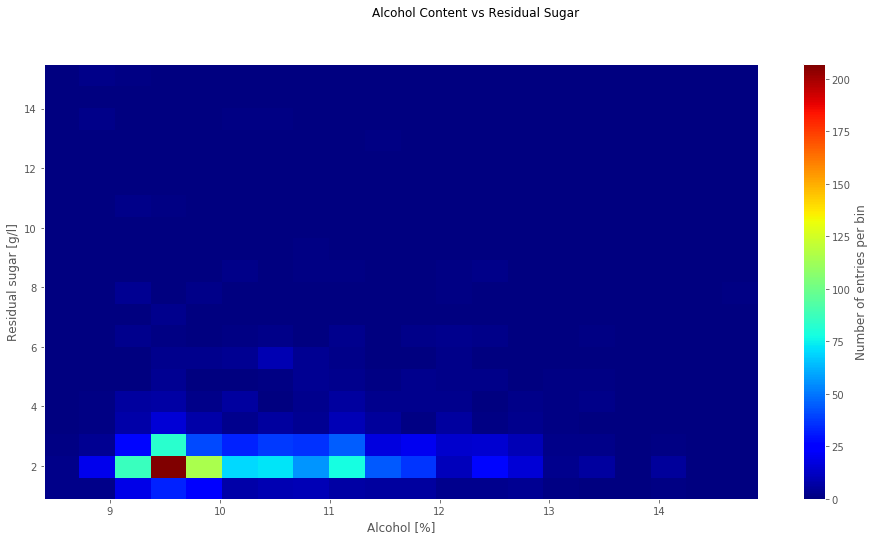

In [12]:
plt.suptitle("Alcohol Content vs Residual Sugar")
plt.hist2d(x=df[df['residual sugar'] < 25]['alcohol'], 
           y=df[df['residual sugar'] < 25]['residual sugar'], 
           bins=20, 
           cmap=mpl.cm.jet)
plt.xlabel('Alcohol [%]')
plt.ylabel('Residual sugar [g/l]');
cb = plt.colorbar()
cb.set_label('Number of entries per bin')

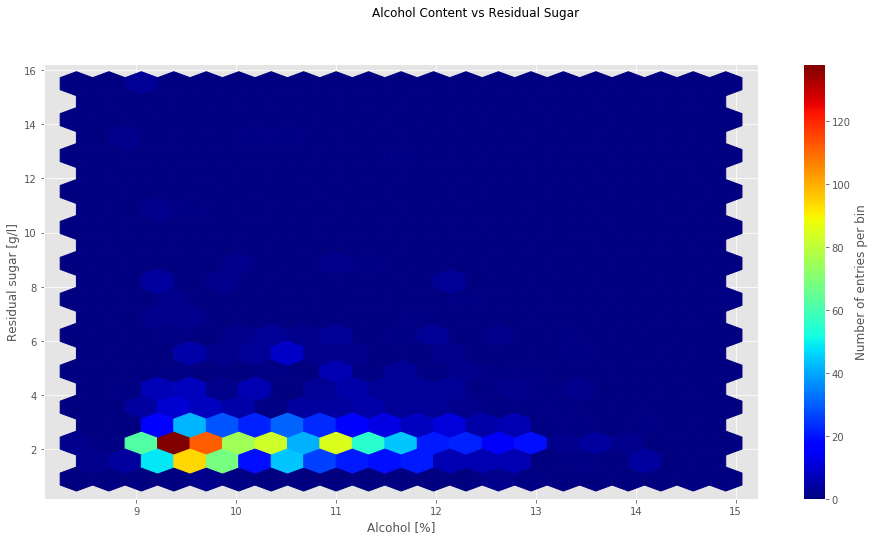

In [13]:
plt.suptitle("Alcohol Content vs Residual Sugar")
plt.hexbin(x=df[df['residual sugar'] < 25]['alcohol'], 
           y=df[df['residual sugar'] < 25]['residual sugar'], 
           gridsize=20, 
           cmap=mpl.cm.jet)
plt.xlabel('Alcohol [%]')
plt.ylabel('Residual sugar [g/l]');
cb = plt.colorbar()
cb.set_label('Number of entries per bin')

---
_This notebook is licensed under a [Creative Commons Attribution 4.0 International License (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/). Copyright © 2018 [Point 8 GmbH](https://point-8.de)_